<a href="https://colab.research.google.com/github/SaurabhTiwari7757/Keras/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [61]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential

In [62]:
from tensorflow.keras.layers import Flatten, Dense

In [63]:
(X_train,Y_train),(X_test,Y_test)= keras.datasets.mnist.load_data()   

In [64]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


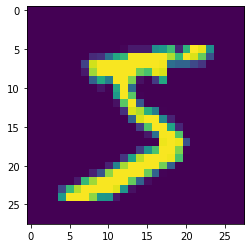

In [65]:
plt.imshow(X_train[0])

In [66]:
Y_train[0]

5

In [67]:
X_train = X_train/255
X_test = X_test/255

In [68]:
model = Sequential()

In [69]:
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(optimizer = 'Adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [72]:
history = model.fit(X_train, Y_train, batch_size = 64 , epochs=10, validation_split=0.2, verbose = 1)

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.3311 - accuracy: 0.9085 - val_loss: 0.1863 - val_accuracy: 0.9451
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1517 - accuracy: 0.9560 - val_loss: 0.1348 - val_accuracy: 0.9627
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1052 - accuracy: 0.9695 - val_loss: 0.1098 - val_accuracy: 0.9688
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0803 - accuracy: 0.9768 - val_loss: 0.0994 - val_accuracy: 0.9714
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0630 - accuracy: 0.9825 - val_loss: 0.0934 - val_accuracy: 0.9728
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0509 - accuracy: 0.9849 - val_loss: 0.0893 - val_accuracy: 0.9737
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0410 - accuracy: 0.9880 - val_loss: 0.0921 - val_accuracy: 0.9725
Epoch 

In [73]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.9773


[0.07781842350959778, 0.9772999882698059]

In [74]:
model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


array([[1.4578012e-09, 5.9537965e-11, 6.0791456e-07, ..., 9.9997699e-01,
        1.8891971e-08, 2.2325396e-07],
       [1.3029856e-09, 6.9378245e-07, 9.9999917e-01, ..., 1.8652180e-15,
        1.0994624e-07, 5.2765879e-15],
       [3.0764165e-06, 9.9638128e-01, 8.4574996e-05, ..., 1.5488962e-03,
        1.7823639e-03, 2.5935404e-05],
       ...,
       [2.5036497e-14, 2.6484091e-14, 7.0095394e-13, ..., 3.4621701e-07,
        1.0697099e-09, 5.7915084e-08],
       [1.0331784e-12, 2.2562957e-15, 2.1263895e-14, ..., 8.6952962e-12,
        1.5555807e-07, 1.9033375e-13],
       [3.1038088e-09, 5.4906466e-12, 8.0746121e-09, ..., 2.5206051e-15,
        5.9870803e-11, 1.0709672e-09]], dtype=float32)

In [75]:
#model.predict_classes(X_test)

In [76]:
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 0s 1ms/step


In [77]:
classes_x

array([7, 2, 1, ..., 4, 5, 6])

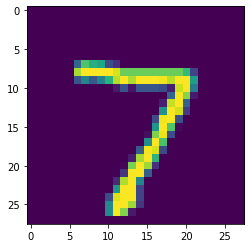

In [78]:
plt.imshow(X_test[0])

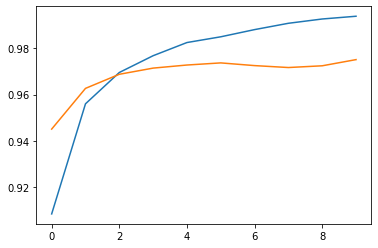

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [42]:
from kerastuner.tuners import RandomSearch

In [41]:
# Objective: To Find:-
# Number of hidden layers we should have
# Number of neurons we should have
# Learning rate

In [ ]:
def buildmodel(cp):
    model = keras.Sequential()
    for i in range(cp.Int('num layers',2,20)):
        model.add(Dense(cp.Int('units_'+str(i),min_value = 32, max_value = 512, step = 32),activation = 'relu'))
        model.add(Dense(1, activation = 'softmax'))
        model.compile(optimizer = keras.optimizers.Adam(cp.Choice('learning_rate',[1e-2,1e-3,1e-4]))
                      , loss=keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])
        return model

In [ ]:
tuner = RandomSearch(buildmodel,
                     objective = 'val_accuracy',
                     max_trials = 10, 
                     executions_per_trial =3,
                     overwrite = True)
tuner.search_space_summary() #Give details of what all searches we are doing

In [ ]:
#tuner.search(X_train,y_train,epochs = 5, validation_data = (X_test,y_test), callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])
#.search(X_train,y_train,epochs = 5, validation_data = (X_test,y_test))